<a href="https://www.kaggle.com/stuthineal/bars-of-money-factors-that-affect-income?scriptVersionId=89140257" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv
/kaggle/input/kaggle-survey-2021/supplementary_data/kaggle_survey_2021_methodology.pdf
/kaggle/input/kaggle-survey-2021/supplementary_data/kaggle_survey_2021_answer_choices.pdf


In [2]:
df_response=pd.read_csv('/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv')
df_response = df_response[~df_response.Q2.str.contains("Selected Choice")]
df_response['Q25'] = df_response['Q25'].replace(['$0-999'],'Level 1: $0-9,999')
df_response['Q25'] = df_response['Q25'].replace(['1,000-1,999'],'Level 1: $0-9,999')
df_response['Q25'] = df_response['Q25'].replace(['2,000-2,999'],'Level 1: $0-9,999')
df_response['Q25'] = df_response['Q25'].replace(['3,000-3,999'],'Level 1: $0-9,999')
df_response['Q25'] = df_response['Q25'].replace(['4,000-4,999'],'Level 1: $0-9,999')
df_response['Q25'] = df_response['Q25'].replace(['5,000-7,499'],'Level 1: $0-9,999')
df_response['Q25'] = df_response['Q25'].replace(['7,500-9,999'],'Level 1: $0-9,999')

df_response['Q25'] = df_response['Q25'].replace(['10,000-14,999'],'Level 2: $10,000-39,999')
df_response['Q25'] = df_response['Q25'].replace(['15,000-19,999'],'Level 2: $10,000-39,999')
df_response['Q25'] = df_response['Q25'].replace(['20,000-24,999'],'Level 2: $10,000-39,999')
df_response['Q25'] = df_response['Q25'].replace(['25,000-29,999'],'Level 2: $10,000-39,999')
df_response['Q25'] = df_response['Q25'].replace(['30,000-39,999'],'Level 2: $10,000-39,999')

df_response['Q25'] = df_response['Q25'].replace(['40,000-49,999'],'Level 3: $40,000-79,999')
df_response['Q25'] = df_response['Q25'].replace(['50,000-59,999'],'Level 3: $40,000-79,999')
df_response['Q25'] = df_response['Q25'].replace(['60,000-69,999'],'Level 3: $40,000-79,999')
df_response['Q25'] = df_response['Q25'].replace(['70,000-79,999'],'Level 3: $40,000-79,999')

df_response['Q25'] = df_response['Q25'].replace(['80,000-89,999'],'Level 4: $80,000-149,999')
df_response['Q25'] = df_response['Q25'].replace(['90,000-99,999'],'Level 4: $80,000-149,999')
df_response['Q25'] = df_response['Q25'].replace(['100,000-124,999'],'Level 4: $80,000-149,999')
df_response['Q25'] = df_response['Q25'].replace(['125,000-149,999'],'Level 4: $80,000-149,999')

df_response['Q25'] = df_response['Q25'].replace(['150,000-199,999'],'Level 5: $150,000-499,999')
df_response['Q25'] = df_response['Q25'].replace(['200,000-249,999'],'Level 5: $150,000-499,999')
df_response['Q25'] = df_response['Q25'].replace(['250,000-299,999'],'Level 5: $150,000-499,999')
df_response['Q25'] = df_response['Q25'].replace(['300,000-499,999'],'Level 5: $150,000-499,999')

df_response['Q25'] = df_response['Q25'].replace(['$500,000-999,999'],'Level 6: > $500,000')
df_response['Q25'] = df_response['Q25'].replace(['>$1,000,000'],'Level 6: > $500,000')

df_response['Q4'] = df_response['Q4'].replace(['No formal education past high school'],'Upto HS')
df_response['Q4'] = df_response['Q4'].replace(['Some college/university study without earning a bachelor’s degree'],'College/no degree')

df_response['Q23'] = df_response['Q23'].replace(['We are exploring ML methods (and may one day put a model into production)'],'Level 1 -Exploring ML')
df_response['Q23'] = df_response['Q23'].replace(['We use ML methods for generating insights (but do not put working models into production)'],'Level 2- ML insights')

df_response['Q23'] = df_response['Q23'].replace(['We recently started using ML methods (i.e., models in production for less than 2 years)'],'Level 3 - ML recent users')
df_response['Q23'] = df_response['Q23'].replace(['We have well established ML methods (i.e., models in production for more than 2 years)'],'Level 4 - ML established users')

df_response['Q23'] = df_response['Q23'].replace(['No (we do not use ML methods)'],'No ML')
df_response['Q23'] = df_response['Q23'].replace(['I do not know'],'Not Aware')

df_response['Q15'] = df_response['Q15'].replace(['Under 1 year'],' 1 year or less')
df_response['Q15'] = df_response['Q15'].replace(['1-2 years'],'1-2 years')

df_response['Q15'] = df_response['Q15'].replace(['2-3 years'],'2-5 years')
df_response['Q15'] = df_response['Q15'].replace(['3-4 years'],'2-5 years')

df_response['Q15'] = df_response['Q15'].replace(['4-5 years'],'2-5 years')
df_response['Q15'] = df_response['Q15'].replace(['5-10 years'],'5-10 years')

df_response['Q15'] = df_response['Q15'].replace(['10-20 years'],'>10 years')
df_response['Q15'] = df_response['Q15'].replace(['20 or more years'],'>10 years')
df_response['Q15'] = df_response['Q15'].replace(['I do not use machine learning methods'],'No Exp with ML')

df_response['Q3'] = df_response['Q3'].replace(['United States of America'],'USA')





/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# “Earn Nicely, spend wisely and you will live happily.” ― Auliq Ice
#### As kagglers we all know a job is the field of data science is one of the highest paid jobs in today’s market. But does everyone working in this field get paid high salaries? What are the key factors that affect income? Let's find out who is earning the highest salary in this field and how! 

#### We will perform two kinds of analysis. First we will analyze respondent's **background* - their age, where they live and education levels. Secondly, we will analyze their **job roles** - the size of the company, years of experience, ML focus.. 

#### In The given data set, the salary levels are grouped and ordered as below. 
* Level 1: \\$0-9,999 
* Level 2: \\$10,000-39,999
* Level 3: \\$40,000-79,999
* Level 4: \\$80,000-149,999
* Level 5: \\$150,000-499,999
* Level 6: > \\$500,000

* We can see that majority of respondents earn less than 10,000 USD a year! 
* The second highest percent are in the Level 2 salary range of 10,000 - 40,000. 30% of the respondents are in the mid-level salary range. 
* However, there are around 5% of respondents who earn more than 150,000 a year. 

### Who earns a Level 5 or 6 salary range and what makes them different?


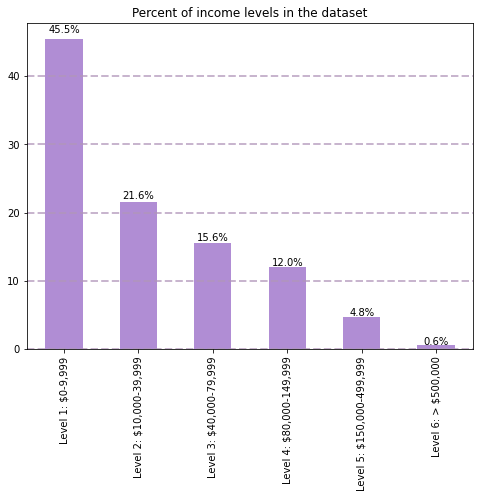

In [3]:
df_exp = df_response['Q25'].value_counts(normalize=True).to_frame('Percent')
df_exp['Percent'] = round(df_exp['Percent'].mul(100),1)

df_exp = df_exp.sort_index(ascending=True)
ax = df_exp.plot.bar(color='#8f5dc3', alpha=0.7,figsize=(8, 6), title ="Percent of income levels in the dataset", legend=None )
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}%', (x + width/2, y + height*1.02), ha='center')
plt.grid(color='#b196ba', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

# Does Location matter? 
#### First, let's see where most of the people who responded to the survey live. We will then analyze the top 5 countries that took part in the survey. 
#### We see the top 5 countries that responded to the survey were India, United States of America, Japan, China, Brazil.


In [4]:
#Creating Dataframes for each income level
df_temp = df_response[df_response['Q3'] != 'Other']
df_top5=df_temp['Q3'].value_counts()
df_top5=df_top5.sort_values(ascending= False).head(5)


top5C = ['India',"USA",'Japan','China','Brazil']
df_countries = df_response[df_response.Q3.isin(top5C)]

Level1 = ['Level 1: $0-9,999']
df_l1 = df_countries[df_countries.Q25.isin(Level1)]
Level2 = ['Level 2: $10,000-39,999']
df_l2 = df_countries[df_countries.Q25.isin(Level2)]

Level3 = ['Level 3: $40,000-79,999']
df_l3 = df_countries[df_countries.Q25.isin(Level3)]

Level4 = ['Level 4: $80,000-149,999']
df_l4 = df_countries[df_countries.Q25.isin(Level4)]

Level5 = ['Level 5: $150,000-499,999']
df_l5 = df_countries[df_countries.Q25.isin(Level5)]

Level6 = ['Level 6: > $500,000']
df_l6 = df_countries[df_countries.Q25.isin(Level6)]

#### Now let's look at each salary band and see the distribution of countries in it. 
* In the Level 1 and Level 2 bands, we see most respondents are from India.  
* Level 3 Salary has an almost equal distribution of countries. 
* In higher salary levels of Level 4,5 and 6, almost 80% are from the United States of America.
* In the small number of people who earn higher than 500,000. 26% of them live in India.


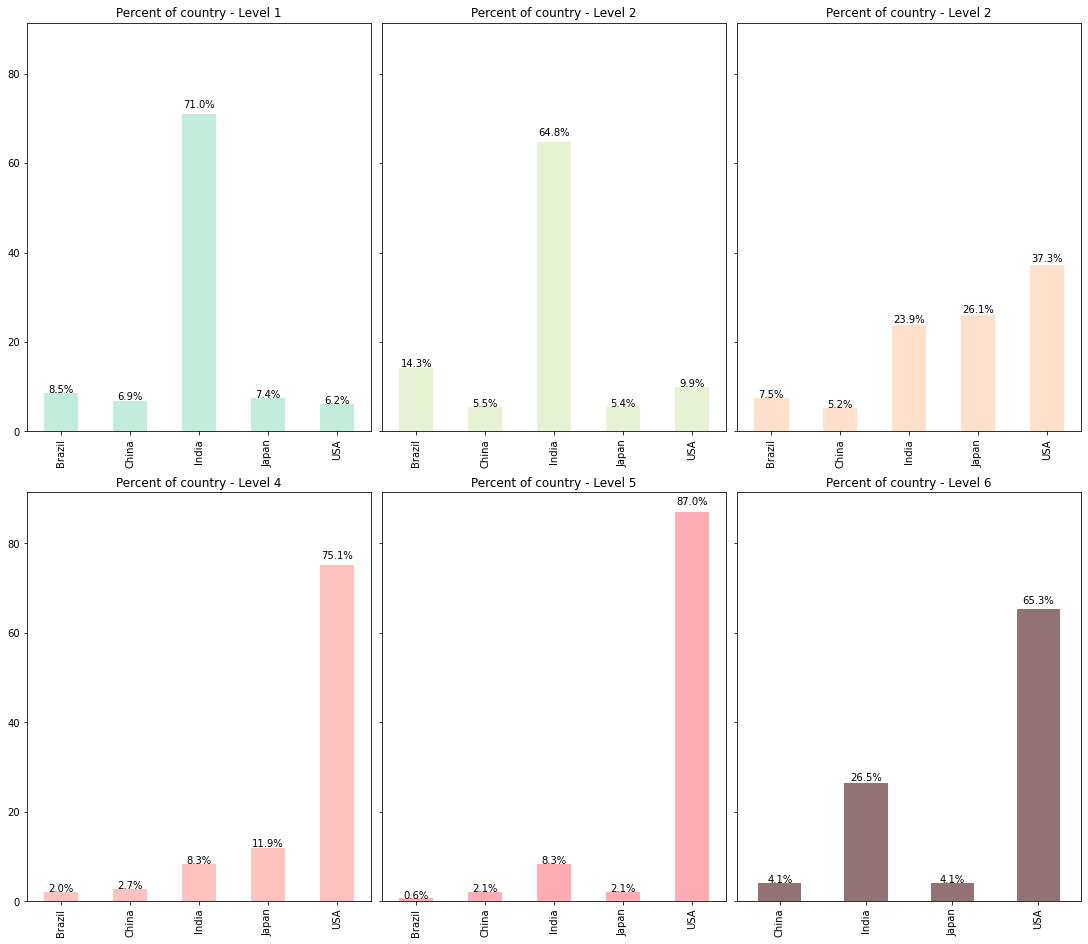

In [5]:
df_exp1 = df_l1['Q3'].value_counts(normalize=True).to_frame('Percent')
df_exp1['Percent'] = round(df_exp1['Percent'].mul(100),1)
df_exp1 = df_exp1.sort_index(ascending=True)

df_exp2 = df_l2['Q3'].value_counts(normalize=True).to_frame('Percent')
df_exp2['Percent'] = round(df_exp2['Percent'].mul(100),1)
df_exp2 = df_exp2.sort_index(ascending=True)


df_exp3 = df_l3['Q3'].value_counts(normalize=True).to_frame('Percent')
df_exp3['Percent'] = round(df_exp3['Percent'].mul(100),1)
df_exp3 = df_exp3.sort_index(ascending=True)


df_exp4 = df_l4['Q3'].value_counts(normalize=True).to_frame('Percent')
df_exp4['Percent'] = round(df_exp4['Percent'].mul(100),1)
df_exp4 = df_exp4.sort_index(ascending=True)

df_exp5 = df_l5['Q3'].value_counts(normalize=True).to_frame('Percent')
df_exp5['Percent'] = round(df_exp5['Percent'].mul(100),1)
df_exp5 = df_exp5.sort_index(ascending=True)


df_exp6 = df_l6['Q3'].value_counts(normalize=True).to_frame('Percent')
df_exp6['Percent'] = round(df_exp6['Percent'].mul(100),1)
df_exp6 = df_exp6.sort_index(ascending=True)


df_list = [df_exp1 ,df_exp2, df_exp3, df_exp4,df_exp5,df_exp6]

fig, axes = plt.subplots(2, 3,sharey=True,constrained_layout = True)
colors =['#a8e6cf', '#dcedc1', '#ffd3b6', '#ffaaa5', '#ff8b94', '#66373B']
titles =['Percent of country - Level 1', 'Percent of country - Level 2', 'Percent of country - Level 2', 'Percent of country - Level 4', 'Percent of country - Level 5', 'Percent of country - Level 6']
# plot counter
count=0
for r in range(2):
    for c in range(3):
        ax = df_list[count].plot.bar(color=colors[count],alpha=0.7,ax=axes[r,c],figsize=(15, 13), title =titles[count], legend=None )
        for p in ax.patches:
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy() 
            ax.annotate(f'{height}%', (x + width/2, y + height*1.02), ha='center')

        #df_list[count].plot.bar(color='royalblue', alpha=0.7,ax=axes[r,c],figsize=(18, 16))
        count+=1

plt.show()

# Does age matter?
### As we analyze our dataset we can see the majority of the respondents are between 18 to 30 years.


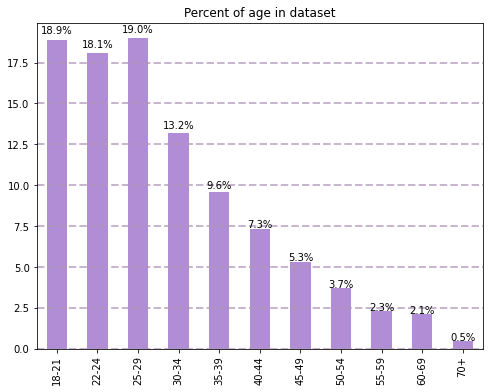

In [6]:
df_exp = df_response['Q1'].value_counts(normalize=True).to_frame('Percent')
df_exp['Percent'] = round(df_exp['Percent'].mul(100),1)

df_exp = df_exp.sort_index(ascending=True)
ax = df_exp.plot.bar(color='#8f5dc3', alpha=0.7,figsize=(8, 6), title ="Percent of age in dataset", legend=None)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}%', (x + width/2, y + height*1.02), ha='center')
plt.grid(color='#b196ba', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

## We see a clear change in the salary trend as age increases. 
* The number of people between the ages 22-30 is highest in the Level 1 salary range. 
* People between 25-35 increases in the Level 2 and 3.
* Level 4 sees an increase in ages 30 to 40. 
* Surprisingly, there is a dip in the ages 40-45 in the Level 5 range. But ages 35-50 still are the most likely to earn a level 5 salary. 
* Level 6 has a very varied range of ages, perhaps due to the low number of responses in this range.


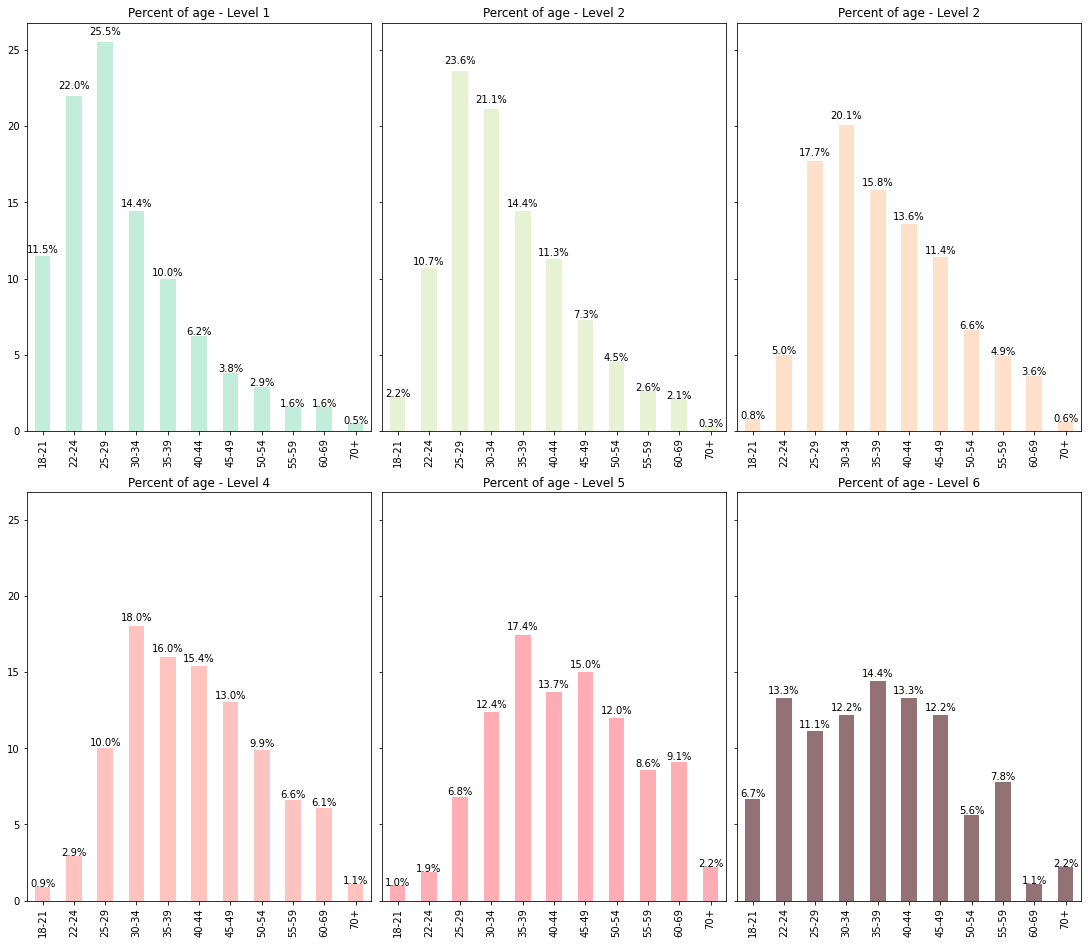

In [7]:
Level1 = ['Level 1: $0-9,999']
df_l1 = df_response[df_response.Q25.isin(Level1)]
Level2 = ['Level 2: $10,000-39,999']
df_l2 = df_response[df_response.Q25.isin(Level2)]

Level3 = ['Level 3: $40,000-79,999']
df_l3 = df_response[df_response.Q25.isin(Level3)]

Level4 = ['Level 4: $80,000-149,999']
df_l4 = df_response[df_response.Q25.isin(Level4)]

Level5 = ['Level 5: $150,000-499,999']
df_l5 = df_response[df_response.Q25.isin(Level5)]

Level6 = ['Level 6: > $500,000']
df_l6 = df_response[df_response.Q25.isin(Level6)]

df_exp1 = df_l1['Q1'].value_counts(normalize=True).to_frame('Percent')
df_exp1['Percent'] = round(df_exp1['Percent'].mul(100),1)
df_exp1 = df_exp1.sort_index(ascending=True)

df_exp2 = df_l2['Q1'].value_counts(normalize=True).to_frame('Percent')
df_exp2['Percent'] = round(df_exp2['Percent'].mul(100),1)
df_exp2 = df_exp2.sort_index(ascending=True)


df_exp3 = df_l3['Q1'].value_counts(normalize=True).to_frame('Percent')
df_exp3['Percent'] = round(df_exp3['Percent'].mul(100),1)
df_exp3 = df_exp3.sort_index(ascending=True)


df_exp4 = df_l4['Q1'].value_counts(normalize=True).to_frame('Percent')
df_exp4['Percent'] = round(df_exp4['Percent'].mul(100),1)
df_exp4 = df_exp4.sort_index(ascending=True)

df_exp5 = df_l5['Q1'].value_counts(normalize=True).to_frame('Percent')
df_exp5['Percent'] = round(df_exp5['Percent'].mul(100),1)
df_exp5 = df_exp5.sort_index(ascending=True)


df_exp6 = df_l6['Q1'].value_counts(normalize=True).to_frame('Percent')
df_exp6['Percent'] = round(df_exp6['Percent'].mul(100),1)
df_exp6 = df_exp6.sort_index(ascending=True)


df_list = [df_exp1 ,df_exp2, df_exp3, df_exp4,df_exp5,df_exp6]

fig, axes = plt.subplots(2, 3,sharey=True,constrained_layout = True)
colors =['#a8e6cf', '#dcedc1', '#ffd3b6', '#ffaaa5', '#ff8b94', '#66373B']
titles =['Percent of age - Level 1', 'Percent of age - Level 2', 'Percent of age - Level 2', 'Percent of age - Level 4', 'Percent of age - Level 5', 'Percent of age - Level 6']

# plot counter
count=0
for r in range(2):
    for c in range(3):
        ax = df_list[count].plot.bar(color=colors[count],alpha=0.7,ax=axes[r,c],figsize=(15, 13), title =titles[count], legend=None)
        for p in ax.patches:
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy() 
            ax.annotate(f'{height}%', (x + width/2, y + height*1.02), ha='center')

        #df_list[count].plot.bar(color='royalblue', alpha=0.7,ax=axes[r,c],figsize=(18, 16))
        count+=1

plt.show()

# Do degrees matter?
### How does education level affect income?
* When we analyze the dataset, we can see that every pay scale has a combination of various degree holders. 
* But we can clearly see the percent of Master's and Doctorate degree holders increase with pay level. 
* The percent of respondents with a Bachelor's degree is highest in Level 1 and slowly reduces as the salary range increases, 
* At least 50% of Level 4 and 5 have masters and 20-30% of Level 4 and 5 respondents are doctorates. 
* In fact, 20% of Level 6 Salary are doctorates. But Level 6 once again has a very varied range of Education levels. This may be because of the number of respondents in that category or at the end of the day salary range may just come down to pure talent. :)


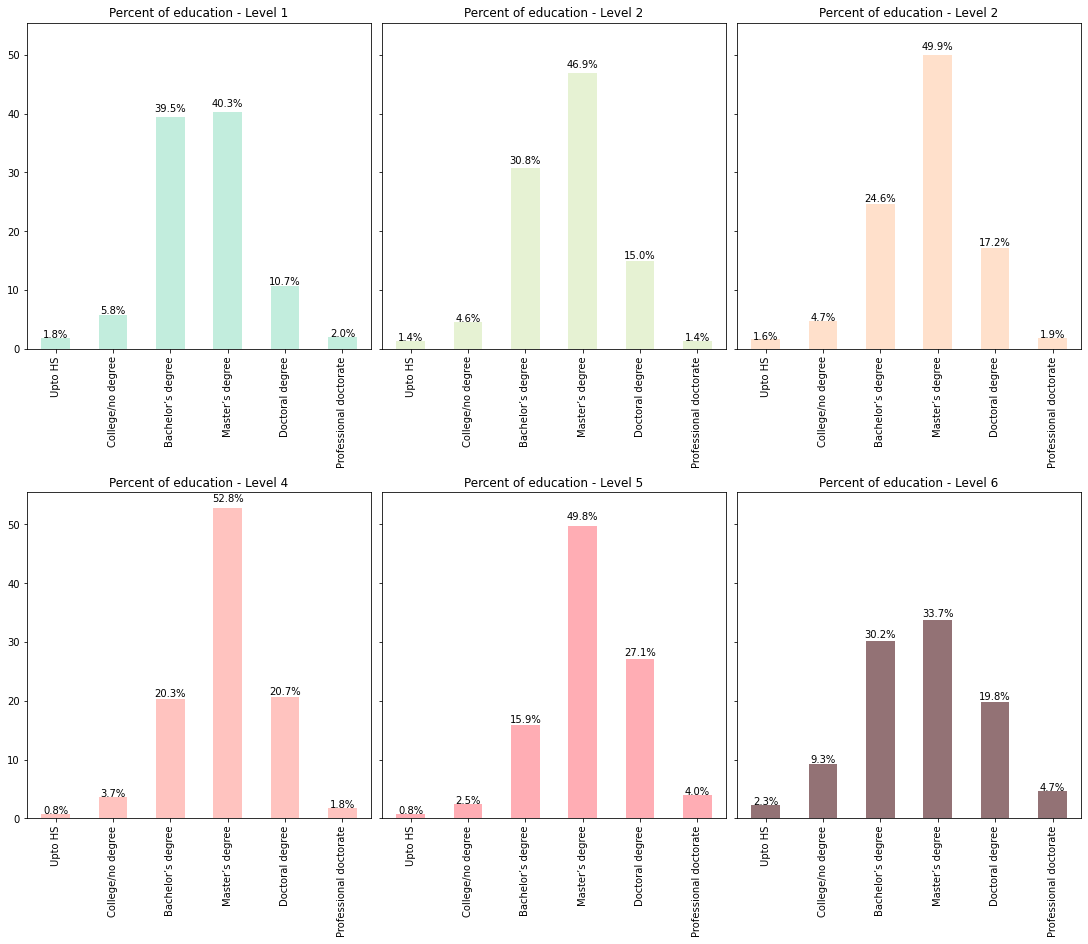

In [8]:
df_temp = df_response[df_response['Q4'] != 'I prefer not to answer']
df_temp.loc[:,'Q4'] = pd.Categorical(df_temp.loc[:,'Q4'], ['Upto HS','College/no degree','Bachelor’s degree','Master’s degree','Doctoral degree','Professional doctorate'])
df_temp.sort_values("Q4")

Level1 = ['Level 1: $0-9,999']
df_l1 = df_temp[df_temp.Q25.isin(Level1)]
Level2 = ['Level 2: $10,000-39,999']
df_l2 = df_temp[df_temp.Q25.isin(Level2)]

Level3 = ['Level 3: $40,000-79,999']
df_l3 = df_temp[df_temp.Q25.isin(Level3)]

Level4 = ['Level 4: $80,000-149,999']
df_l4 = df_temp[df_temp.Q25.isin(Level4)]

Level5 = ['Level 5: $150,000-499,999']
df_l5 = df_temp[df_temp.Q25.isin(Level5)]

Level6 = ['Level 6: > $500,000']
df_l6 = df_temp[df_temp.Q25.isin(Level6)]

df_exp1 = df_l1['Q4'].value_counts(normalize=True).to_frame('Percent')
df_exp1['Percent'] = round(df_exp1['Percent'].mul(100),1)
df_exp1 = df_exp1.sort_index(ascending=True)

df_exp2 = df_l2['Q4'].value_counts(normalize=True).to_frame('Percent')
df_exp2['Percent'] = round(df_exp2['Percent'].mul(100),1)
df_exp2 = df_exp2.sort_index(ascending=True)


df_exp3 = df_l3['Q4'].value_counts(normalize=True).to_frame('Percent')
df_exp3['Percent'] = round(df_exp3['Percent'].mul(100),1)
df_exp3 = df_exp3.sort_index(ascending=True)


df_exp4 = df_l4['Q4'].value_counts(normalize=True).to_frame('Percent')
df_exp4['Percent'] = round(df_exp4['Percent'].mul(100),1)
df_exp4 = df_exp4.sort_index(ascending=True)

df_exp5 = df_l5['Q4'].value_counts(normalize=True).to_frame('Percent')
df_exp5['Percent'] = round(df_exp5['Percent'].mul(100),1)
df_exp5 = df_exp5.sort_index(ascending=True)


df_exp6 = df_l6['Q4'].value_counts(normalize=True).to_frame('Percent')
df_exp6['Percent'] = round(df_exp6['Percent'].mul(100),1)
df_exp6 = df_exp6.sort_index(ascending=True)


df_list = [df_exp1 ,df_exp2, df_exp3, df_exp4,df_exp5,df_exp6]

fig, axes = plt.subplots(2, 3,sharey=True,constrained_layout = True)
colors =['#a8e6cf', '#dcedc1', '#ffd3b6', '#ffaaa5', '#ff8b94', '#66373B']
titles =['Percent of education - Level 1', 'Percent of education - Level 2', 'Percent of education - Level 2', 'Percent of education - Level 4', 'Percent of education - Level 5', 'Percent of education - Level 6']

# plot counter
count=0
for r in range(2):
    for c in range(3):
        ax = df_list[count].plot.bar(color=colors[count],alpha=0.7,ax=axes[r,c],figsize=(15, 13), title =titles[count], legend=None)
        for p in ax.patches:
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy() 
            ax.annotate(f'{height}%', (x + width/2, y + height*1.02), ha='center')

        #df_list[count].plot.bar(color='royalblue', alpha=0.7,ax=axes[r,c],figsize=(18, 16))
        count+=1

plt.show()

# Does the Job Role matter?
#### Now that we understand the background of people, where they live, their ages, education levels. Let's analyze their jobs and see what kind of jobs earn the highest salaries. 
We consider the top 6 job roles selected by the respondents. The top job roles are Student,Data Scientist,Software Engineer,Data Analyst,Research Scientist and Machine Learning Engineer.
* Not all job roles are the same even though thy may sound similar and have overlapping responsibilities. Data analyst is not the same as Data scientist. 
* 20% of people earning Level 1 -level 3 salary ranges are data analysists, but only 1-5% of level 4-6 are data analysts. 
* The number of Data scientists and Software engineers increase as the Salary range increases. 
* Machine Learning Engineers and Research scientists increase in the Level 3-5 range. 


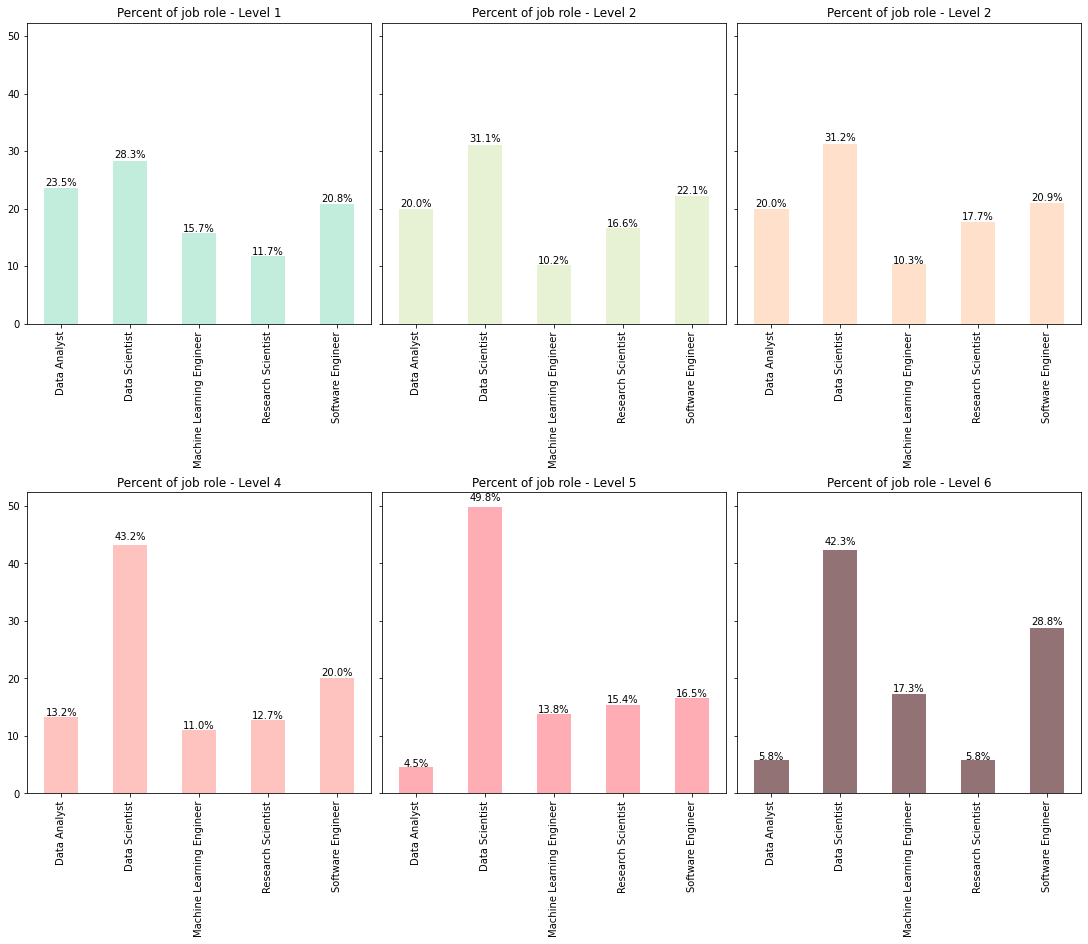

In [9]:

df_top7roles = df_response['Q5'].value_counts().sort_values(ascending = False)
top7 =['Student','Data Scientist','Software Engineer','Data Analyst','Research Scientist','Machine Learning Engineer']
df_temp = df_response[df_response.Q5.isin(top7)]
Level1 = ['Level 1: $0-9,999']
df_l1 = df_temp[df_temp.Q25.isin(Level1)]
Level2 = ['Level 2: $10,000-39,999']
df_l2 = df_temp[df_temp.Q25.isin(Level2)]

Level3 = ['Level 3: $40,000-79,999']
df_l3 = df_temp[df_temp.Q25.isin(Level3)]

Level4 = ['Level 4: $80,000-149,999']
df_l4 = df_temp[df_temp.Q25.isin(Level4)]

Level5 = ['Level 5: $150,000-499,999']
df_l5 = df_temp[df_temp.Q25.isin(Level5)]

Level6 = ['Level 6: > $500,000']
df_l6 = df_temp[df_temp.Q25.isin(Level6)]

df_exp1 = df_l1['Q5'].value_counts(normalize=True).to_frame('Percent')
df_exp1['Percent'] = round(df_exp1['Percent'].mul(100),1)
df_exp1 = df_exp1.sort_index(ascending=True)

df_exp2 = df_l2['Q5'].value_counts(normalize=True).to_frame('Percent')
df_exp2['Percent'] = round(df_exp2['Percent'].mul(100),1)
df_exp2 = df_exp2.sort_index(ascending=True)


df_exp3 = df_l3['Q5'].value_counts(normalize=True).to_frame('Percent')
df_exp3['Percent'] = round(df_exp3['Percent'].mul(100),1)
df_exp3 = df_exp3.sort_index(ascending=True)


df_exp4 = df_l4['Q5'].value_counts(normalize=True).to_frame('Percent')
df_exp4['Percent'] = round(df_exp4['Percent'].mul(100),1)
df_exp4 = df_exp4.sort_index(ascending=True)

df_exp5 = df_l5['Q5'].value_counts(normalize=True).to_frame('Percent')
df_exp5['Percent'] = round(df_exp5['Percent'].mul(100),1)
df_exp5 = df_exp5.sort_index(ascending=True)


df_exp6 = df_l6['Q5'].value_counts(normalize=True).to_frame('Percent')
df_exp6['Percent'] = round(df_exp6['Percent'].mul(100),1)
df_exp6 = df_exp6.sort_index(ascending=True)


df_list = [df_exp1 ,df_exp2, df_exp3, df_exp4,df_exp5,df_exp6]

fig, axes = plt.subplots(2, 3,sharey=True,constrained_layout = True)
colors =['#a8e6cf', '#dcedc1', '#ffd3b6', '#ffaaa5', '#ff8b94', '#66373B']
titles =['Percent of job role - Level 1', 'Percent of job role - Level 2', 'Percent of job role - Level 2', 'Percent of job role - Level 4', 'Percent of job role - Level 5', 'Percent of job role - Level 6']

# plot counter
count=0
for r in range(2):
    for c in range(3):
        ax = df_list[count].plot.bar(color=colors[count],alpha=0.7,ax=axes[r,c],figsize=(15, 13), title =titles[count], legend=None)
        for p in ax.patches:
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy() 
            ax.annotate(f'{height}%', (x + width/2, y + height*1.02), ha='center')

        #df_list[count].plot.bar(color='royalblue', alpha=0.7,ax=axes[r,c],figsize=(18, 16))
        count+=1

plt.show()

# Does Experience count?
* We can see a clear trend of increasing salaries as the number of years of experience increases. 
* Level 1 has most people writing code for less than 1 year or 1-3 years. 
* Most of the people earning high salaries in Level 5 and 6 have been writing code for more than 10 years at least! 
* If you are just starting out in the field of data science- take heart, every year of experience you gain is valuable!

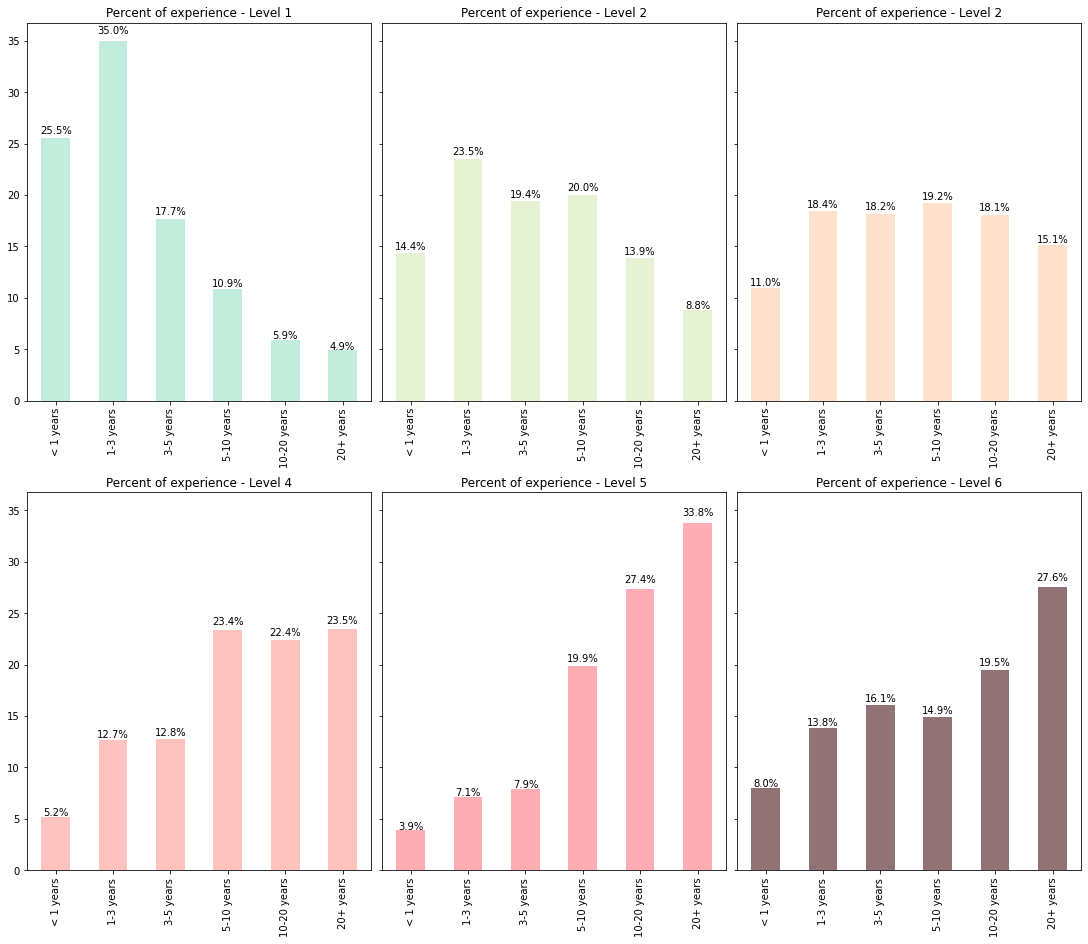

In [10]:
df_temp = df_response[df_response['Q6'] != 'I have never written code']
df_temp.loc[:,'Q6'] = pd.Categorical(df_temp.loc[:,'Q6'], ['< 1 years', '1-3 years', '3-5 years','5-10 years', '10-20 years', '20+ years'])
df_temp.sort_values("Q6")
Level1 = ['Level 1: $0-9,999']
df_l1 = df_temp[df_temp.Q25.isin(Level1)]
Level2 = ['Level 2: $10,000-39,999']
df_l2 = df_temp[df_temp.Q25.isin(Level2)]

Level3 = ['Level 3: $40,000-79,999']
df_l3 = df_temp[df_temp.Q25.isin(Level3)]

Level4 = ['Level 4: $80,000-149,999']
df_l4 = df_temp[df_temp.Q25.isin(Level4)]

Level5 = ['Level 5: $150,000-499,999']
df_l5 = df_temp[df_temp.Q25.isin(Level5)]

Level6 = ['Level 6: > $500,000']
df_l6 = df_temp[df_temp.Q25.isin(Level6)]

df_exp1 = df_l1['Q6'].value_counts(normalize=True).to_frame('Percent')
df_exp1['Percent'] = round(df_exp1['Percent'].mul(100),1)
df_exp1 = df_exp1.sort_index(ascending=True)

df_exp2 = df_l2['Q6'].value_counts(normalize=True).to_frame('Percent')
df_exp2['Percent'] = round(df_exp2['Percent'].mul(100),1)
df_exp2 = df_exp2.sort_index(ascending=True)


df_exp3 = df_l3['Q6'].value_counts(normalize=True).to_frame('Percent')
df_exp3['Percent'] = round(df_exp3['Percent'].mul(100),1)
df_exp3 = df_exp3.sort_index(ascending=True)


df_exp4 = df_l4['Q6'].value_counts(normalize=True).to_frame('Percent')
df_exp4['Percent'] = round(df_exp4['Percent'].mul(100),1)
df_exp4 = df_exp4.sort_index(ascending=True)

df_exp5 = df_l5['Q6'].value_counts(normalize=True).to_frame('Percent')
df_exp5['Percent'] = round(df_exp5['Percent'].mul(100),1)
df_exp5 = df_exp5.sort_index(ascending=True)


df_exp6 = df_l6['Q6'].value_counts(normalize=True).to_frame('Percent')
df_exp6['Percent'] = round(df_exp6['Percent'].mul(100),1)
df_exp6 = df_exp6.sort_index(ascending=True)


df_list = [df_exp1 ,df_exp2, df_exp3, df_exp4,df_exp5,df_exp6]

fig, axes = plt.subplots(2, 3,sharey=True,constrained_layout = True)
colors =['#a8e6cf', '#dcedc1', '#ffd3b6', '#ffaaa5', '#ff8b94', '#66373B']
titles =['Percent of experience - Level 1', 'Percent of experience - Level 2', 'Percent of experience - Level 2', 'Percent of experience - Level 4', 'Percent of experience - Level 5', 'Percent of experience - Level 6']

# plot counter
count=0
for r in range(2):
    for c in range(3):
        ax = df_list[count].plot.bar(color=colors[count],alpha=0.7,ax=axes[r,c],figsize=(15, 13), title =titles[count], legend=None)
        for p in ax.patches:
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy() 
            ax.annotate(f'{height}%', (x + width/2, y + height*1.02), ha='center')

        #df_list[count].plot.bar(color='royalblue', alpha=0.7,ax=axes[r,c],figsize=(18, 16))
        count+=1

plt.show()

# Do large companies pay more? 
* As expected, salaries increase with the size of the company. 
* Level 1 salary range has majority of the people working for a company with less than 250 employees.
* Level 2 salaries have a equal distribution of all company sizes. 
* Level 3 and 4 salaries have a majority of people working for a medium sized company 1000 to 10,000 employees. 
* Level 5 and 6 are clearly dominated by companies with 10,000 or more employees

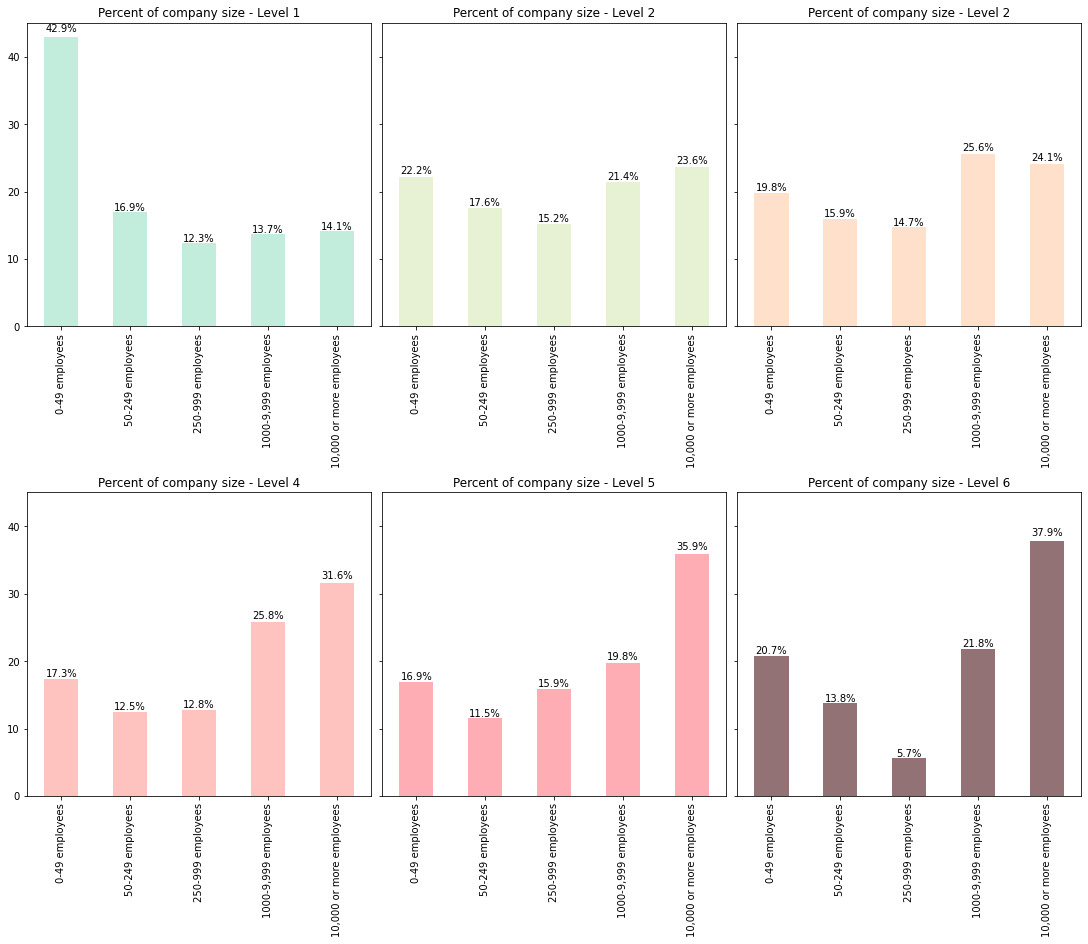

In [11]:
df_temp.loc[:,'Q21'] = pd.Categorical(df_temp.loc[:,'Q21'], ['0-49 employees', '50-249 employees', '250-999 employees','1000-9,999 employees', '10,000 or more employees'])
df_temp.sort_values("Q21")
Level1 = ['Level 1: $0-9,999']
df_l1 = df_temp[df_temp.Q25.isin(Level1)]
Level2 = ['Level 2: $10,000-39,999']
df_l2 = df_temp[df_temp.Q25.isin(Level2)]

Level3 = ['Level 3: $40,000-79,999']
df_l3 = df_temp[df_temp.Q25.isin(Level3)]

Level4 = ['Level 4: $80,000-149,999']
df_l4 = df_temp[df_temp.Q25.isin(Level4)]

Level5 = ['Level 5: $150,000-499,999']
df_l5 = df_temp[df_temp.Q25.isin(Level5)]

Level6 = ['Level 6: > $500,000']
df_l6 = df_temp[df_temp.Q25.isin(Level6)]

df_exp1 = df_l1['Q21'].value_counts(normalize=True).to_frame('Percent')
df_exp1['Percent'] = round(df_exp1['Percent'].mul(100),1)
df_exp1 = df_exp1.sort_index(ascending=True)

df_exp2 = df_l2['Q21'].value_counts(normalize=True).to_frame('Percent')
df_exp2['Percent'] = round(df_exp2['Percent'].mul(100),1)
df_exp2 = df_exp2.sort_index(ascending=True)


df_exp3 = df_l3['Q21'].value_counts(normalize=True).to_frame('Percent')
df_exp3['Percent'] = round(df_exp3['Percent'].mul(100),1)
df_exp3 = df_exp3.sort_index(ascending=True)


df_exp4 = df_l4['Q21'].value_counts(normalize=True).to_frame('Percent')
df_exp4['Percent'] = round(df_exp4['Percent'].mul(100),1)
df_exp4 = df_exp4.sort_index(ascending=True)

df_exp5 = df_l5['Q21'].value_counts(normalize=True).to_frame('Percent')
df_exp5['Percent'] = round(df_exp5['Percent'].mul(100),1)
df_exp5 = df_exp5.sort_index(ascending=True)


df_exp6 = df_l6['Q21'].value_counts(normalize=True).to_frame('Percent')
df_exp6['Percent'] = round(df_exp6['Percent'].mul(100),1)
df_exp6 = df_exp6.sort_index(ascending=True)


df_list = [df_exp1 ,df_exp2, df_exp3, df_exp4,df_exp5,df_exp6]

fig, axes = plt.subplots(2, 3,sharey=True,constrained_layout = True)
colors =['#a8e6cf', '#dcedc1', '#ffd3b6', '#ffaaa5', '#ff8b94', '#66373B']
titles =['Percent of company size - Level 1', 'Percent of company size - Level 2', 'Percent of company size - Level 2', 'Percent of company size - Level 4', 'Percent of company size - Level 5', 'Percent of company size - Level 6']

# plot counter
count=0
for r in range(2):
    for c in range(3):
        ax = df_list[count].plot.bar(color=colors[count],alpha=0.7,ax=axes[r,c],figsize=(15, 13), title =titles[count], legend=None)
        for p in ax.patches:
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy() 
            ax.annotate(f'{height}%', (x + width/2, y + height*1.02), ha='center')

        #df_list[count].plot.bar(color='royalblue', alpha=0.7,ax=axes[r,c],figsize=(18, 16))
        count+=1

plt.show()

# Does a company with more ML focus pay more?
### If we analyze companies that incorporate machine learning methods into their businesses, we see a clear trend of companies with established ML users tend to have the highest salaries. 
In this analysis we renamed the below categories for readability purposes. 
* We are exploring ML methods (and may one day put a model into production) : **Level 1- Exploring ML**
* We use ML methods for generating insights (but do not put working models into production) : **Level 2 - ML insights**
* We recently started using ML methods (i.e., models in production for less than 2 years): **Level 3 - ML recent users** 
* We have well established ML methods (i.e., models in production for more than 2 years) : **Level 4 - ML established users**
* No (we do not use ML methods) : **No ML**
* I do not know: **Not Aware**

As per the analysis, we can see that 
* Level 1 and 2 salary ranges have a majority of users that do not use ML or have just started exploring ML. 
* Level 3 and 4 we see the businesses with no  ML decreasing and businesses exploring or recent ML users increasing. 
* Level 5 and 6 have clear majority of established ML users.


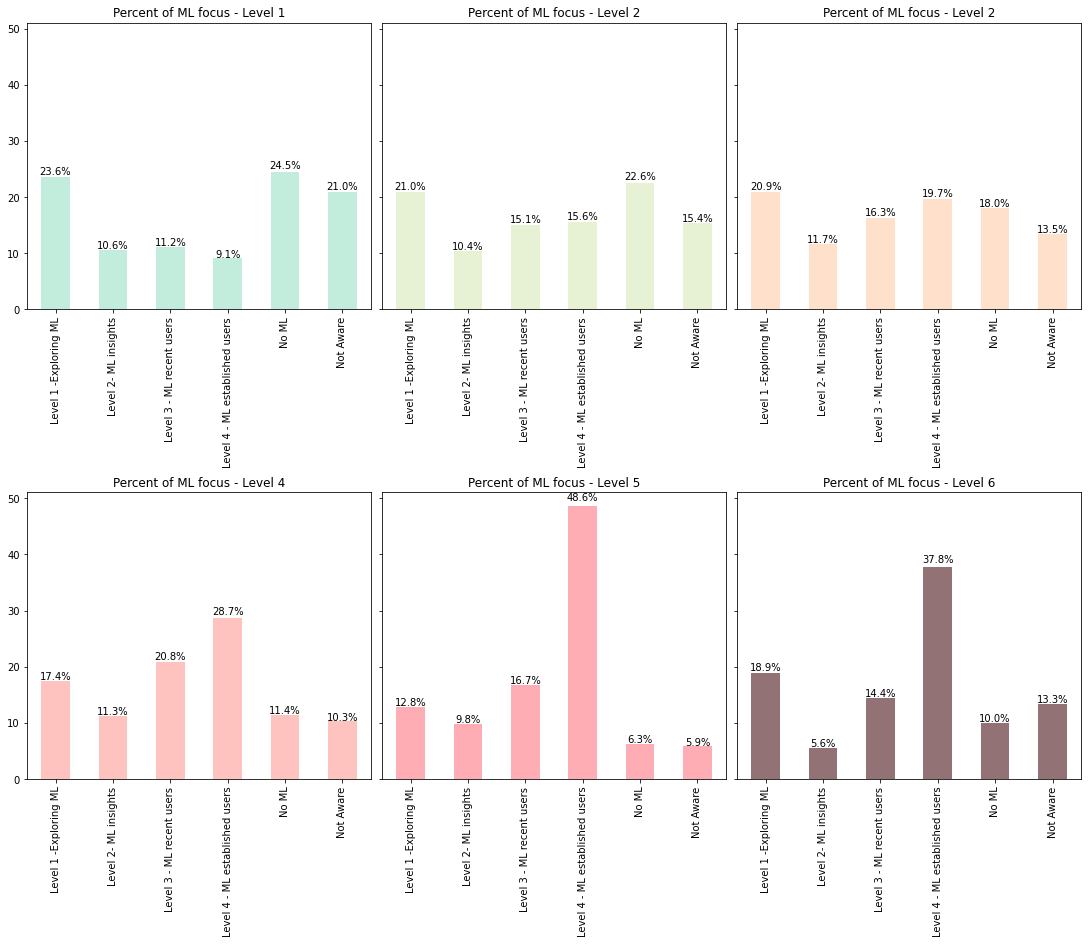

In [12]:

Level1 = ['Level 1: $0-9,999']
df_l1 = df_response[df_response.Q25.isin(Level1)]
Level2 = ['Level 2: $10,000-39,999']
df_l2 = df_response[df_response.Q25.isin(Level2)]

Level3 = ['Level 3: $40,000-79,999']
df_l3 = df_response[df_response.Q25.isin(Level3)]

Level4 = ['Level 4: $80,000-149,999']
df_l4 = df_response[df_response.Q25.isin(Level4)]

Level5 = ['Level 5: $150,000-499,999']
df_l5 = df_response[df_response.Q25.isin(Level5)]

Level6 = ['Level 6: > $500,000']
df_l6 = df_response[df_response.Q25.isin(Level6)]

df_exp1 = df_l1['Q23'].value_counts(normalize=True).to_frame('Percent')
df_exp1['Percent'] = round(df_exp1['Percent'].mul(100),1)
df_exp1 = df_exp1.sort_index(ascending=True)

df_exp2 = df_l2['Q23'].value_counts(normalize=True).to_frame('Percent')
df_exp2['Percent'] = round(df_exp2['Percent'].mul(100),1)
df_exp2 = df_exp2.sort_index(ascending=True)


df_exp3 = df_l3['Q23'].value_counts(normalize=True).to_frame('Percent')
df_exp3['Percent'] = round(df_exp3['Percent'].mul(100),1)
df_exp3 = df_exp3.sort_index(ascending=True)


df_exp4 = df_l4['Q23'].value_counts(normalize=True).to_frame('Percent')
df_exp4['Percent'] = round(df_exp4['Percent'].mul(100),1)
df_exp4 = df_exp4.sort_index(ascending=True)

df_exp5 = df_l5['Q23'].value_counts(normalize=True).to_frame('Percent')
df_exp5['Percent'] = round(df_exp5['Percent'].mul(100),1)
df_exp5 = df_exp5.sort_index(ascending=True)


df_exp6 = df_l6['Q23'].value_counts(normalize=True).to_frame('Percent')
df_exp6['Percent'] = round(df_exp6['Percent'].mul(100),1)
df_exp6 = df_exp6.sort_index(ascending=True)


df_list = [df_exp1 ,df_exp2, df_exp3, df_exp4,df_exp5,df_exp6]

fig, axes = plt.subplots(2, 3,sharey=True,constrained_layout = True)
colors =['#a8e6cf', '#dcedc1', '#ffd3b6', '#ffaaa5', '#ff8b94', '#66373B']
titles =['Percent of ML focus - Level 1', 'Percent of ML focus - Level 2', 'Percent of ML focus - Level 2', 'Percent of ML focus - Level 4', 'Percent of ML focus - Level 5', 'Percent of ML focus - Level 6']

# plot counter
count=0
for r in range(2):
    for c in range(3):
        ax = df_list[count].plot.bar(color=colors[count],alpha=0.7,ax=axes[r,c],figsize=(15, 13), title =titles[count], legend=None)
        for p in ax.patches:
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy() 
            ax.annotate(f'{height}%', (x + width/2, y + height*1.02), ha='center')

        #df_list[count].plot.bar(color='royalblue', alpha=0.7,ax=axes[r,c],figsize=(18, 16))
        count+=1

plt.show()

# ML Frameworks usage
### Let us see what are the top 5 ML frameworks that people use and if their usage changes with salary levels. 
#### We see that Scikit-learn, TensorFlow, Keras, PyTorch and Xgboost are the top 5 ML frameworks used.


In [13]:
#finding the top 5
df_top5=pd.DataFrame(columns = ['Scikit-learn' ,'TensorFlow' ,'Keras' ,'PyTorch' ,'Fast.ai', 'MXNet', 'Xgboost', 'LightGBM', 'CatBoost', 'Prophet', 'H2O 3', 'Caret', 'Tidymodels', 'JAX', 'PyTorch Lightning', 'Huggingface', 'None'], index = [0])

df_top5.loc[0]['Scikit-learn'] = df_response['Q16_Part_1'].count()*100 / len(df_response)
df_top5.loc[0]['TensorFlow']=df_response['Q16_Part_2'].count()*100 / len(df_response)
df_top5.loc[0]['Keras']=df_response['Q16_Part_3'].count()*100 / len(df_response)
df_top5.loc[0]['PyTorch']=df_response['Q16_Part_4'].count() *100/ len(df_response)
df_top5.loc[0]['Fast.ai']=df_response['Q16_Part_5'].count()*100 / len(df_response)
df_top5.loc[0]['MXNet']=df_response['Q16_Part_6'].count()*100 / len(df_response)
df_top5.loc[0]['Xgboost']=df_response['Q16_Part_7'].count()*100 / len(df_response)
df_top5.loc[0]['LightGBM']=df_response['Q16_Part_8'].count()*100 / len(df_response)
df_top5.loc[0]['CatBoost']=df_response['Q16_Part_9'].count()*100 / len(df_response)
df_top5.loc[0]['Prophet']=df_response['Q16_Part_10'].count() *100/ len(df_response)
df_top5.loc[0]['H2O 3']=df_response['Q16_Part_11'].count() *100/ len(df_response)
df_top5.loc[0]['Caret']=df_response['Q16_Part_12'].count()*100 / len(df_response)
df_top5.loc[0]['Tidymodels']=df_response['Q16_Part_13'].count() *100/ len(df_response)
df_top5.loc[0]['JAX']=df_response['Q16_Part_14'].count() *100/ len(df_response)
df_top5.loc[0]['PyTorch Lightning']=df_response['Q16_Part_15'].count()*100 / len(df_response)
df_top5.loc[0]['Huggingface']=df_response['Q16_Part_16'].count()*100 / len(df_response)
df_top5.loc[0]['None']=df_response['Q16_Part_17'].count() *100/ len(df_response)
df_top5 = df_top5.T
df_top5.columns = ['maxval']
df_top5['maxval']=df_top5['maxval'].apply(np.floor)
df_top5=df_top5.sort_values(by=['maxval'],ascending= False).head(5)

### The ML Frameworks usage trend is almost the same for all Salary levels. 
* Scikit-learn is #1 preferred ML framework across all levels, although the percent of users decreases with the salary level. 
* TensorFlow, Keras and PyTorch usage is consistent across all salary bands 
* The use of Xgboost increases with the salary level, signifying that users with a higher salary are using more complex frameworks and algorithms.


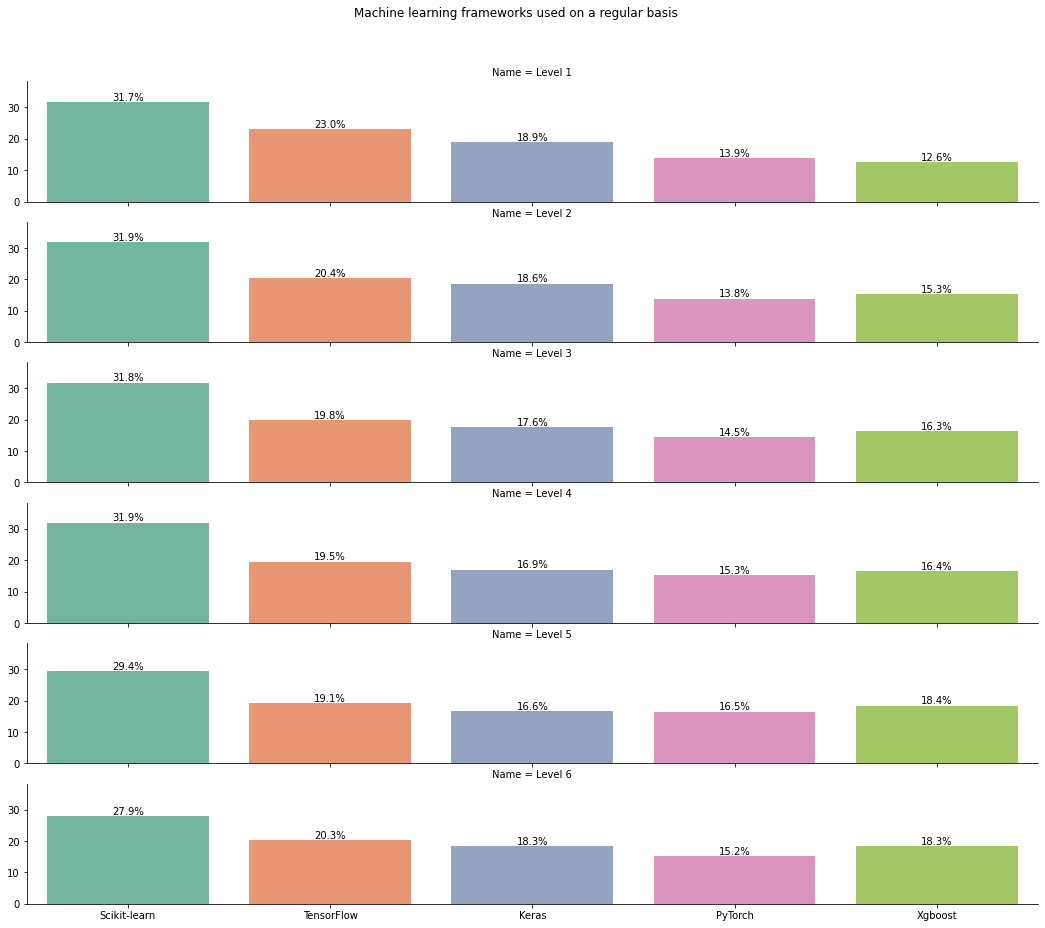

In [14]:
Level1 = ['Level 1: $0-9,999']
df_l1 = df_response[df_response.Q25.isin(Level1)]
Level2 = ['Level 2: $10,000-39,999']
df_l2 = df_response[df_response.Q25.isin(Level2)]

Level3 = ['Level 3: $40,000-79,999']
df_l3 = df_response[df_response.Q25.isin(Level3)]

Level4 = ['Level 4: $80,000-149,999']
df_l4 = df_response[df_response.Q25.isin(Level4)]

Level5 = ['Level 5: $150,000-499,999']
df_l5 = df_response[df_response.Q25.isin(Level5)]

Level6 = ['Level 6: > $500,000']
df_l6 = df_response[df_response.Q25.isin(Level6)]

df_coding=pd.DataFrame(columns = ['Scikit-learn' ,'TensorFlow' ,'Keras' ,'PyTorch' ,'Xgboost'], index = [0,1, 2, 3,4,5])
df_coding.loc[0]['Scikit-learn']=df_l1['Q16_Part_1'].notnull().sum()
df_coding.loc[0]['TensorFlow']=df_l1['Q16_Part_2'].notnull().sum()
df_coding.loc[0]['Keras']=df_l1['Q16_Part_3'].notnull().sum()
df_coding.loc[0]['PyTorch']=df_l1['Q16_Part_4'].notnull().sum()
df_coding.loc[0]['Xgboost']=df_l1['Q16_Part_7'].notnull().sum()


df_coding.loc[1]['Scikit-learn']=df_l2['Q16_Part_1'].notnull().sum()
df_coding.loc[1]['TensorFlow']=df_l2['Q16_Part_2'].notnull().sum()
df_coding.loc[1]['Keras']=df_l2['Q16_Part_3'].notnull().sum()
df_coding.loc[1]['PyTorch']=df_l2['Q16_Part_4'].notnull().sum()
df_coding.loc[1]['Xgboost']=df_l2['Q16_Part_7'].notnull().sum()


df_coding.loc[2]['Scikit-learn']=df_l3['Q16_Part_1'].notnull().sum()
df_coding.loc[2]['TensorFlow']=df_l3['Q16_Part_2'].notnull().sum()
df_coding.loc[2]['Keras']=df_l3['Q16_Part_3'].notnull().sum()
df_coding.loc[2]['PyTorch']=df_l3['Q16_Part_4'].notnull().sum()
df_coding.loc[2]['Xgboost']=df_l3['Q16_Part_7'].notnull().sum()


df_coding.loc[3]['Scikit-learn']=df_l4['Q16_Part_1'].notnull().sum()
df_coding.loc[3]['TensorFlow']=df_l4['Q16_Part_2'].notnull().sum()
df_coding.loc[3]['Keras']=df_l4['Q16_Part_3'].notnull().sum()
df_coding.loc[3]['PyTorch']=df_l4['Q16_Part_4'].notnull().sum()
df_coding.loc[3]['Xgboost']=df_l4['Q16_Part_7'].notnull().sum()


df_coding.loc[4]['Scikit-learn']=df_l5['Q16_Part_1'].notnull().sum()
df_coding.loc[4]['TensorFlow']=df_l5['Q16_Part_2'].notnull().sum()
df_coding.loc[4]['Keras']=df_l5['Q16_Part_3'].notnull().sum()
df_coding.loc[4]['PyTorch']=df_l5['Q16_Part_4'].notnull().sum()
df_coding.loc[4]['Xgboost']=df_l5['Q16_Part_7'].notnull().sum()


df_coding.loc[5]['Scikit-learn']=df_l6['Q16_Part_1'].notnull().sum()
df_coding.loc[5]['TensorFlow']=df_l6['Q16_Part_2'].notnull().sum()
df_coding.loc[5]['Keras']=df_l6['Q16_Part_3'].notnull().sum()
df_coding.loc[5]['PyTorch']=df_l6['Q16_Part_4'].notnull().sum()
df_coding.loc[5]['Xgboost']=df_l6['Q16_Part_7'].notnull().sum()


df_coding = round(df_coding.apply(lambda x: x*100/x.sum(), axis=1),1)

df_coding.loc[:,'Name'] = 'value'
df_coding.loc[0,'Name']="Level 1"
df_coding.loc[1,'Name']="Level 2"
df_coding.loc[2,'Name']="Level 3"
df_coding.loc[3,'Name']="Level 4"
df_coding.loc[4,'Name']="Level 5"
df_coding.loc[5,'Name']="Level 6"




g = sns.catplot(kind='bar', height=3, aspect=3,data=df_coding,row='Name',palette="Set2")
g.fig.set_size_inches(15, 13)
g.fig.subplots_adjust(top=0.9)

g.fig.suptitle('Machine learning frameworks used on a regular basis')

# iterate through axes
for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.1f}%' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

plt.show()

# ML algorithms usage
### Let us see what are the top 5 ML algorithms that people use and if their usage chages with salary levels. 
#### We see that Linear or Logistic Regression, Decision Trees or Random Forests, Gradient Boosting Machines (xgboost, lightgbm, etc),Dense Neural Networks (MLPs, etc) and Convolutional Neural Networks are the top 5 ML algortithms used. 

In [15]:
#finding the top 5
df_top5=pd.DataFrame(columns = ['Linear or Logistic Regression', 'Decision Trees or Random Forests', 'Gradient Boosting Machines (xgboost, lightgbm, etc)', 'Bayesian Approaches', 'Evolutionary Approaches', 'Dense Neural Networks (MLPs, etc)', 'Convolutional Neural Networks', 'Generative Adversarial Networks', 'Recurrent Neural Networks', 'Transformer Networks (BERT, gpt-3, etc)', 'None'], index = [0])

df_top5.loc[0]['Linear or Logistic Regression']=df_response['Q17_Part_1'].count()*100 / len(df_response)
df_top5.loc[0]['Decision Trees or Random Forests']=df_response['Q17_Part_2'].count()*100 / len(df_response)
df_top5.loc[0]['Gradient Boosting Machines (xgboost, lightgbm, etc)']=df_response['Q17_Part_3'].count()*100 / len(df_response)
df_top5.loc[0]['Bayesian Approaches']=df_response['Q17_Part_4'].count()*100 / len(df_response)
df_top5.loc[0]['Evolutionary Approaches']=df_response['Q17_Part_5'].count()*100 / len(df_response)
df_top5.loc[0]['Dense Neural Networks (MLPs, etc)']=df_response['Q17_Part_6'].count()*100 / len(df_response)
df_top5.loc[0]['Convolutional Neural Networks']=df_response['Q17_Part_7'].count()*100 / len(df_response)
df_top5.loc[0]['Generative Adversarial Networks']=df_response['Q17_Part_8'].count()*100 / len(df_response)
df_top5.loc[0]['Recurrent Neural Networks']=df_response['Q17_Part_9'].count()*100 / len(df_response)
df_top5.loc[0]['Transformer Networks (BERT, gpt-3, etc)']=df_response['Q17_Part_10'].count()*100 / len(df_response)
df_top5.loc[0]['None']=df_response['Q17_Part_11'].count()*100 / len(df_response)

df_top5 = df_top5.T
df_top5.columns = ['maxval']
df_top5['maxval']=df_top5['maxval'].apply(np.floor)
df_top5=df_top5.sort_values(by=['maxval'],ascending= False).head(5)

### The ML algorithms usage trend is almost the same for all Salary levels. 
* Linear or Logistic Regression is the most common  ML algorithm across all levels, although the percent of users decreases with the salary level. 
* Decision Trees and CNN usage is consistent with small variations across all salary bands. 
* More complex algorithms like the Gradient Boosting Machines, Dense Neural Networks show an increase as the salary increases.


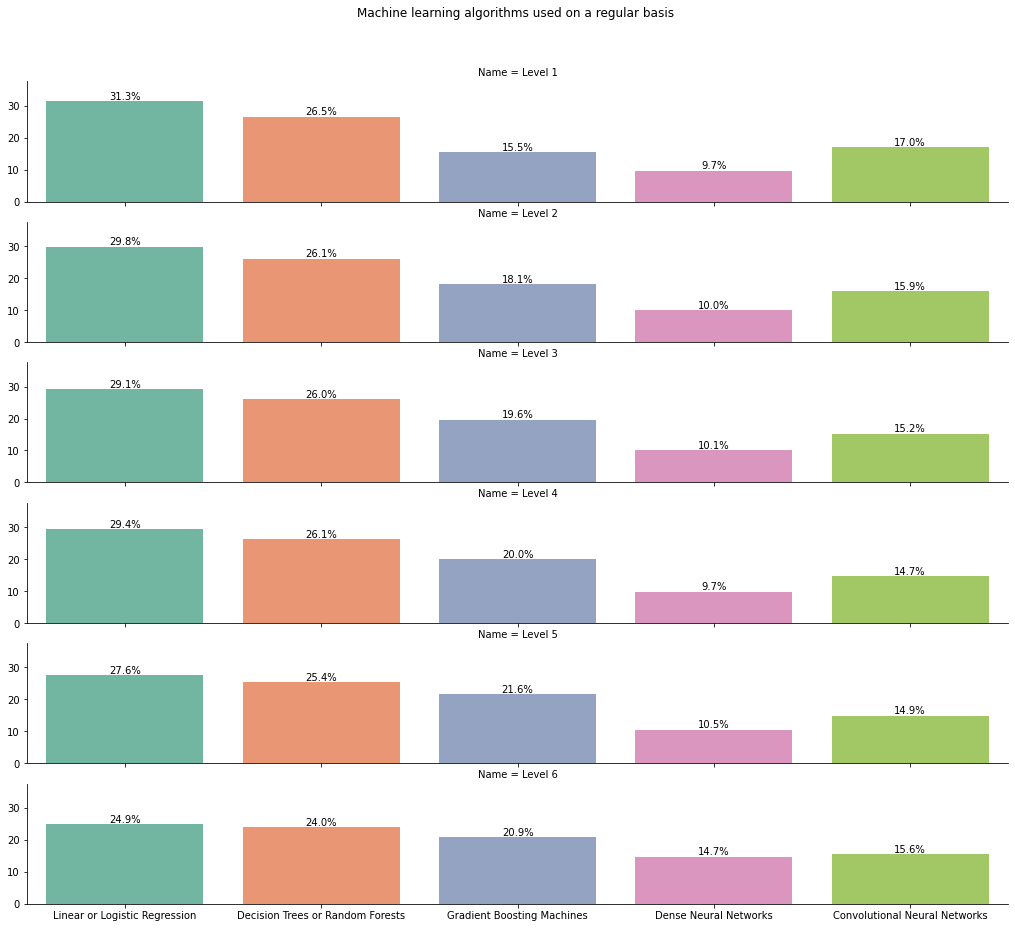

In [16]:
df_coding=pd.DataFrame(columns = ['Linear or Logistic Regression', 'Decision Trees or Random Forests', 'Gradient Boosting Machines', 'Dense Neural Networks', 'Convolutional Neural Networks'], index = [0,1, 2, 3,4,5])



df_coding.loc[0]['Linear or Logistic Regression']=df_l1['Q17_Part_1'].notnull().sum()
df_coding.loc[0]['Decision Trees or Random Forests']=df_l1['Q17_Part_2'].notnull().sum()
df_coding.loc[0]['Gradient Boosting Machines']=df_l1['Q17_Part_3'].notnull().sum()
df_coding.loc[0]['Dense Neural Networks']=df_l1['Q17_Part_6'].notnull().sum()
df_coding.loc[0]['Convolutional Neural Networks']=df_l1['Q17_Part_7'].notnull().sum()

df_coding.loc[1]['Linear or Logistic Regression']=df_l2['Q17_Part_1'].notnull().sum()
df_coding.loc[1]['Decision Trees or Random Forests']=df_l2['Q17_Part_2'].notnull().sum()
df_coding.loc[1]['Gradient Boosting Machines']=df_l2['Q17_Part_3'].notnull().sum()
df_coding.loc[1]['Dense Neural Networks']=df_l2['Q17_Part_6'].notnull().sum()
df_coding.loc[1]['Convolutional Neural Networks']=df_l2['Q17_Part_7'].notnull().sum()

df_coding.loc[2]['Linear or Logistic Regression']=df_l3['Q17_Part_1'].notnull().sum()
df_coding.loc[2]['Decision Trees or Random Forests']=df_l3['Q17_Part_2'].notnull().sum()
df_coding.loc[2]['Gradient Boosting Machines']=df_l3['Q17_Part_3'].notnull().sum()
df_coding.loc[2]['Dense Neural Networks']=df_l3['Q17_Part_6'].notnull().sum()
df_coding.loc[2]['Convolutional Neural Networks']=df_l3['Q17_Part_7'].notnull().sum()

df_coding.loc[3]['Linear or Logistic Regression']=df_l4['Q17_Part_1'].notnull().sum()
df_coding.loc[3]['Decision Trees or Random Forests']=df_l4['Q17_Part_2'].notnull().sum()
df_coding.loc[3]['Gradient Boosting Machines']=df_l4['Q17_Part_3'].notnull().sum()
df_coding.loc[3]['Dense Neural Networks']=df_l4['Q17_Part_6'].notnull().sum()
df_coding.loc[3]['Convolutional Neural Networks']=df_l4['Q17_Part_7'].notnull().sum()

df_coding.loc[4]['Linear or Logistic Regression']=df_l5['Q17_Part_1'].notnull().sum()
df_coding.loc[4]['Decision Trees or Random Forests']=df_l5['Q17_Part_2'].notnull().sum()
df_coding.loc[4]['Gradient Boosting Machines']=df_l5['Q17_Part_3'].notnull().sum()
df_coding.loc[4]['Dense Neural Networks']=df_l5['Q17_Part_6'].notnull().sum()
df_coding.loc[4]['Convolutional Neural Networks']=df_l5['Q17_Part_7'].notnull().sum()

df_coding.loc[5]['Linear or Logistic Regression']=df_l6['Q17_Part_1'].notnull().sum()
df_coding.loc[5]['Decision Trees or Random Forests']=df_l6['Q17_Part_2'].notnull().sum()
df_coding.loc[5]['Gradient Boosting Machines']=df_l6['Q17_Part_3'].notnull().sum()
df_coding.loc[5]['Dense Neural Networks']=df_l6['Q17_Part_6'].notnull().sum()
df_coding.loc[5]['Convolutional Neural Networks']=df_l6['Q17_Part_7'].notnull().sum()

df_coding = round(df_coding.apply(lambda x: x*100/x.sum(), axis=1),1)

df_coding.loc[:,'Name'] = 'value'
df_coding.loc[0,'Name']="Level 1"
df_coding.loc[1,'Name']="Level 2"
df_coding.loc[2,'Name']="Level 3"
df_coding.loc[3,'Name']="Level 4"
df_coding.loc[4,'Name']="Level 5"
df_coding.loc[5,'Name']="Level 6"

g = sns.catplot(kind='bar', height=3, aspect=3,data=df_coding,row='Name',palette="Set2")
g.fig.set_size_inches(15, 13)
g.fig.subplots_adjust(top=0.9)

g.fig.suptitle('Machine learning algorithms used on a regular basis')

# iterate through axes
for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.1f}%' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

plt.show()

# Cloud computing platforms usage
### Let us see what are the top cloud computing platforms that people use and if their usage changes with salary levels. 
#### We see that Amazon Web Services (AWS), Google Cloud Platform (GCP), Microsoft Azure are the top 3 cloud platforms used. In this survey 10% of the respondents do not even use cloud platforms. But based on the participants that do use cloud services, we can make the following observations.
 


In [17]:
#finding the top 5
df_top5=pd.DataFrame(columns = ['Amazon Web Services (AWS)','Microsoft Azure','Google Cloud Platform (GCP)','IBM Cloud / Red Hat','Oracle Cloud','SAP Cloud','Salesforce Cloud','VMware Cloud','Alibaba Cloud','Tencent Cloud','None'], index = [0])

df_top5.loc[0]['Amazon Web Services (AWS)']=df_response['Q27_A_Part_1'].count()*100 / len(df_response)
df_top5.loc[0]['Microsoft Azure']=df_response['Q27_A_Part_2'].count()*100 / len(df_response)
df_top5.loc[0]['Google Cloud Platform (GCP)']=df_response['Q27_A_Part_3'].count()*100 / len(df_response)
df_top5.loc[0]['IBM Cloud / Red Hat']=df_response['Q27_A_Part_4'].count()*100 / len(df_response)
df_top5.loc[0]['Oracle Cloud']=df_response['Q27_A_Part_5'].count()*100 / len(df_response)
df_top5.loc[0]['SAP Cloud']=df_response['Q27_A_Part_6'].count()*100 / len(df_response)
df_top5.loc[0]['Salesforce Cloud']=df_response['Q27_A_Part_7'].count()*100 / len(df_response)
df_top5.loc[0]['VMware Cloud']=df_response['Q27_A_Part_8'].count()*100 / len(df_response)
df_top5.loc[0]['Alibaba Cloud']=df_response['Q27_A_Part_9'].count()*100 / len(df_response)
df_top5.loc[0]['Tencent Cloud']=df_response['Q27_A_Part_10'].count()*100 / len(df_response)
df_top5.loc[0]['None']=df_response['Q27_A_Part_11'].count()*100 / len(df_response)


df_top5 = df_top5.T
df_top5.columns = ['maxval']
df_top5['maxval']=df_top5['maxval'].apply(np.floor)
df_top5=df_top5.sort_values(by=['maxval'],ascending= False).head(8)


### Cloud computing platforms usage preferences changes for each salary level. 
* Google Cloud Platform (GCP) is heavily used in the Level 1 Salary range. perhaps this is because it is the most affordable but the usage decreases as Salary level increases
* AWS use increases with rise in the salary level. 
* Azure usage is consistent with small variations across all salary bands.


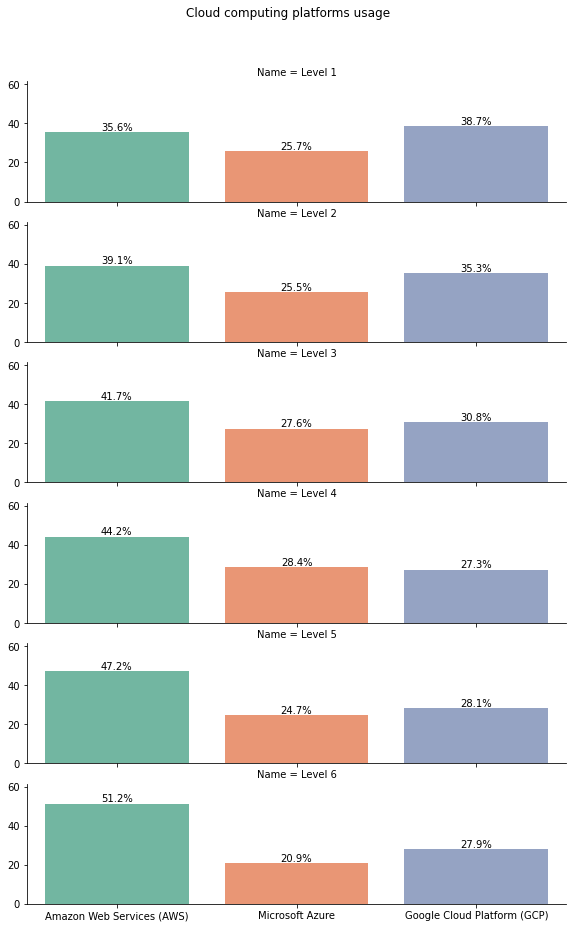

In [18]:
df_coding=pd.DataFrame(columns =['Amazon Web Services (AWS)','Microsoft Azure','Google Cloud Platform (GCP)'], index = [0,1, 2, 3,4,5])



df_coding.loc[0]['Amazon Web Services (AWS)']=df_l1['Q27_A_Part_1'].notnull().sum()
df_coding.loc[0]['Microsoft Azure']=df_l1['Q27_A_Part_2'].notnull().sum()
df_coding.loc[0]['Google Cloud Platform (GCP)']=df_l1['Q27_A_Part_3'].notnull().sum()

df_coding.loc[1]['Amazon Web Services (AWS)']=df_l2['Q27_A_Part_1'].notnull().sum()
df_coding.loc[1]['Microsoft Azure']=df_l2['Q27_A_Part_2'].notnull().sum()
df_coding.loc[1]['Google Cloud Platform (GCP)']=df_l2['Q27_A_Part_3'].notnull().sum()

df_coding.loc[2]['Amazon Web Services (AWS)']=df_l3['Q27_A_Part_1'].notnull().sum()
df_coding.loc[2]['Microsoft Azure']=df_l3['Q27_A_Part_2'].notnull().sum()
df_coding.loc[2]['Google Cloud Platform (GCP)']=df_l3['Q27_A_Part_3'].notnull().sum()


df_coding.loc[3]['Amazon Web Services (AWS)']=df_l4['Q27_A_Part_1'].notnull().sum()
df_coding.loc[3]['Microsoft Azure']=df_l4['Q27_A_Part_2'].notnull().sum()
df_coding.loc[3]['Google Cloud Platform (GCP)']=df_l4['Q27_A_Part_3'].notnull().sum()

df_coding.loc[4]['Amazon Web Services (AWS)']=df_l5['Q27_A_Part_1'].notnull().sum()
df_coding.loc[4]['Microsoft Azure']=df_l5['Q27_A_Part_2'].notnull().sum()
df_coding.loc[4]['Google Cloud Platform (GCP)']=df_l5['Q27_A_Part_3'].notnull().sum()


df_coding.loc[5]['Amazon Web Services (AWS)']=df_l6['Q27_A_Part_1'].notnull().sum()
df_coding.loc[5]['Microsoft Azure']=df_l6['Q27_A_Part_2'].notnull().sum()
df_coding.loc[5]['Google Cloud Platform (GCP)']=df_l6['Q27_A_Part_3'].notnull().sum()

df_coding = round(df_coding.apply(lambda x: x*100/x.sum(), axis=1),1)

df_coding.loc[:,'Name'] = 'value'
df_coding.loc[0,'Name']="Level 1"
df_coding.loc[1,'Name']="Level 2"
df_coding.loc[2,'Name']="Level 3"
df_coding.loc[3,'Name']="Level 4"
df_coding.loc[4,'Name']="Level 5"
df_coding.loc[5,'Name']="Level 6"

g = sns.catplot(kind='bar', height=3, aspect=3,data=df_coding,row='Name',palette="Set2")
g.fig.set_size_inches(8, 13)
g.fig.subplots_adjust(top=0.9)

g.fig.suptitle('Cloud computing platforms usage')

# iterate through axes
for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.1f}%' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

plt.show()

# CONCLUSION
## This analysis confirms a well known trend. Data scientists with a Master's degree, working in a large company with more than 10,000 employees and a focus on ML approaches have the highest probability of earning a salary higher than 150,000 USD.  